# Filtering Data
`L0~gs.`api`.log.57_13-09-2019_06:59 34703 INFO gs.`openstack.wsgi.server `[ req-y9mjwk-n1yj-6wl35r-nhwlbg ] `HTTP exception thrown: No entry found for any event

The `highlighted` text does not provide intuition about the log hence should be removed


The code inputs the given log file and outputs a clean file ("new.txt") with important features
## Input
`L0~gs.`api`.log.57_13-09-2019_06:59 34703 INFO gs.`openstack.wsgi.server `[ req-y9mjwk-n1yj-6wl35r-nhwlbg ] `HTTP exception thrown: No entry found for any event

## output
_**api , openstack wsgi server ,  HTTP exception thrown  No entry found for any event**_

In [361]:
import re
log=[]
f_new= open("new2.txt",'w')
with open("private_test_set.txt") as f:
    for line in f:
        idx=line.find("~gs")
        if idx!=-1:
            new=line[idx+4:]
        idx1=new.find(".log")
        idx2=new.find("INFO")
        if idx1!=-1 and idx2!=-1:
            new=new[:idx1]+" "+new[idx2+8:]
        new=new.replace("] [","*")
        idx1=new.find("[")
        idx2=new.find("]")
        if idx1!=-1 and idx2!=-1:
            new=new[:idx1]+" "+new[idx2+1:]
        idx=new.find("status:")
        if idx!=-1:
            new=new[:idx]
        new = re.sub('[^a-zA-Z \n\ ]', ' ', new)
        print(new , file=f_new)
        
f_new.close()

# Features
the useful words will act as features of log
`features` is a list of useful word (space seperated string) in log

features[i] denotes ith line of log

In [362]:
features=[]
with open("new2.txt","r") as f:  # opening the saved file
    for i in f:
        if i!="\n":
            features+=[" ".join(i.split())]

In [363]:
len(features)

1050

# Count Vecterization
as computer only understands numbers,so we will convert words to integers
makes one hot encoding of words in ith string

In [364]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_ = vectorizer.fit_transform(features)

In [365]:
print((len(vectorizer.get_feature_names())))

686


# Dimention Reduction
as we have extra features which dont contribute in classification we will decrease its dimentions to 10.

Here we will use **autoencoder** to decrease dimentionality
## AutoEncoder
An autoencoder is a neural network that learns to copy its input to its output. It has an internal (hidden) layer that describes a code used to represent the input, and it is constituted by two main parts: an encoder that maps the input into the code, and a decoder that maps the code to a reconstruction of the original input.

This is why usually autoencoders are restricted in ways that force them to reconstruct the input only approximately, prioritizing the most relevant aspects of the data to be copied. 

In [366]:
%pylab inline
import os
import keras
import metrics
import numpy as np
import pandas as pd
import keras.backend as K

from time import time

from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

# from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


/home/sk/Dev/machine_learning/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [367]:
# this is our input placeholder
input_ = Input(shape=((len(vectorizer.get_feature_names())),))

encoded = Dense(10, activation='sigmoid')(input_)

decoded = Dense((len(vectorizer.get_feature_names())))(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_, decoded)

In [368]:
autoencoder.summary()

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 686)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 10)                6870      
_________________________________________________________________
dense_118 (Dense)            (None, 686)               7546      
Total params: 14,416
Trainable params: 14,416
Non-trainable params: 0
_________________________________________________________________


In [369]:
encoder = Model(input_, encoded)

In [370]:
autoencoder.compile(optimizer='adam', loss='mse')

Here epoch and batch size are calculated on the basis of trail and error method

In [371]:
train_history = autoencoder.fit(X_, X_, epochs=500, batch_size=1024)

Epoch 1/500
1050/1050 [==============================] - 0s 75us/step - loss: 0.0270
Epoch 2/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0254
Epoch 3/500
1050/1050 [==============================] - 0s 22us/step - loss: 0.0239
Epoch 4/500
1050/1050 [==============================] - 0s 26us/step - loss: 0.0227
Epoch 5/500
1050/1050 [==============================] - 0s 19us/step - loss: 0.0216
Epoch 6/500
1050/1050 [==============================] - 0s 21us/step - loss: 0.0208
Epoch 7/500
1050/1050 [==============================] - 0s 20us/step - loss: 0.0201
Epoch 8/500
1050/1050 [==============================] - 0s 22us/step - loss: 0.0195
Epoch 9/500
1050/1050 [==============================] - 0s 20us/step - loss: 0.0190
Epoch 10/500
1050/1050 [==============================] - 0s 20us/step - loss: 0.0186
Epoch 11/500
1050/1050 [==============================] - 0s 24us/step - loss: 0.0183
Epoch 12/500
1050/1050 [==============================] - 0s 22

1050/1050 [==============================] - 0s 23us/step - loss: 0.0137
Epoch 97/500
1050/1050 [==============================] - 0s 18us/step - loss: 0.0137
Epoch 98/500
1050/1050 [==============================] - 0s 18us/step - loss: 0.0137
Epoch 99/500
1050/1050 [==============================] - 0s 20us/step - loss: 0.0136
Epoch 100/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0136
Epoch 101/500
1050/1050 [==============================] - 0s 19us/step - loss: 0.0136
Epoch 102/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0135
Epoch 103/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0135
Epoch 104/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0135
Epoch 105/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0134
Epoch 106/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0134
Epoch 107/500
1050/1050 [==============================] - 0

1050/1050 [==============================] - 0s 14us/step - loss: 0.0108
Epoch 191/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0107
Epoch 192/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0107
Epoch 193/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0107
Epoch 194/500
1050/1050 [==============================] - 0s 22us/step - loss: 0.0107
Epoch 195/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0106
Epoch 196/500
1050/1050 [==============================] - 0s 13us/step - loss: 0.0106
Epoch 197/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0106
Epoch 198/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0106
Epoch 199/500
1050/1050 [==============================] - 0s 13us/step - loss: 0.0105
Epoch 200/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0105
Epoch 201/500
1050/1050 [==============================] 

1050/1050 [==============================] - 0s 17us/step - loss: 0.0088
Epoch 285/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0087
Epoch 286/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0087
Epoch 287/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0087
Epoch 288/500
1050/1050 [==============================] - 0s 13us/step - loss: 0.0087
Epoch 289/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0087
Epoch 290/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0087
Epoch 291/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0087
Epoch 292/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0086
Epoch 293/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0086
Epoch 294/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0086
Epoch 295/500
1050/1050 [==============================] 

1050/1050 [==============================] - 0s 15us/step - loss: 0.0076
Epoch 379/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0076
Epoch 380/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0076
Epoch 381/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0076
Epoch 382/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0076
Epoch 383/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0075
Epoch 384/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0075
Epoch 385/500
1050/1050 [==============================] - 0s 19us/step - loss: 0.0075
Epoch 386/500
1050/1050 [==============================] - 0s 18us/step - loss: 0.0075
Epoch 387/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0075
Epoch 388/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0075
Epoch 389/500
1050/1050 [==============================] 

1050/1050 [==============================] - 0s 17us/step - loss: 0.0068
Epoch 473/500
1050/1050 [==============================] - 0s 14us/step - loss: 0.0068
Epoch 474/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0068
Epoch 475/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0068
Epoch 476/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0068
Epoch 477/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0068
Epoch 478/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0068
Epoch 479/500
1050/1050 [==============================] - 0s 17us/step - loss: 0.0068
Epoch 480/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0068
Epoch 481/500
1050/1050 [==============================] - 0s 15us/step - loss: 0.0068
Epoch 482/500
1050/1050 [==============================] - 0s 16us/step - loss: 0.0068
Epoch 483/500
1050/1050 [==============================] 

In [372]:
X_new=encoder.predict(X_)

In [373]:
X_new.shape

(1050, 10)

The new dimentions are 10
# K Means Clusttring
Now we will use kmeans clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset


## Elbow Method for optimal value of k in KMeans


In [374]:

from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
X=X_new
for k in range(5,21): 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

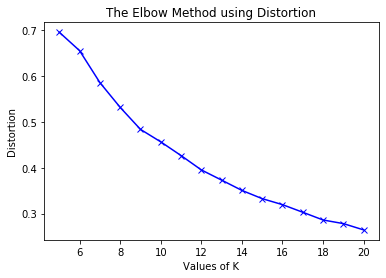

In [375]:

plt.plot(range(5,21), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


applying kmeans with optimal n_clusters

In [376]:
km = KMeans(n_jobs=-1, n_clusters=20, n_init=20)
# pred_auto_train = encoder.predict(X_new)
km.fit(X_new)
pred = km.predict(X_new)

Stroing prediction in csv file

In [377]:
with open("ans1.csv","w") as f:
    for i in pred:
        print("C"+str(i+1),file=f)